In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
from scipy.stats import linregress

loading data files for the human development index and gdp per capita. also, setting the minimum and max year values

In [2]:
hdi_df = pd.read_csv('./data-sources/Human Development Index - Full.csv')
imf_gdp_df = pd.read_csv('./data-sources/gdp-per-capita.csv')

# setting the minimum and maximum values; max is set for the current year
min_year = 1990
current_datetime = datetime.now()
current_year = current_datetime.year


code cleanup, including the column names, and sorting them by country and year for HDI

In [3]:
column_list = [col for col in hdi_df.columns if col.startswith('Human Development Index (') and (int(col.replace(')', '').replace('Human Development Index (', '')) >= min_year) and (int(col.replace(')', '').replace('Human Development Index (', '')) <= current_year)]
column_list = ['Country'] + column_list

hdi_clean_df = hdi_df[column_list].dropna()
clean_df_columns = hdi_clean_df.columns
clean_df_columns = [col.replace(')', '').replace('Human Development Index (', '') for col in clean_df_columns]
hdi_clean_df.columns = clean_df_columns
hdi_clean_df.reset_index(drop=True, inplace=True)
hdi_clean_df = pd.melt(hdi_clean_df, id_vars=['Country'], var_name='Year').sort_values(by=['Country', 'Year'])
hdi_clean_df

,Country,Year,value
0,Afghanistan,1990,0.273
141,Afghanistan,1991,0.279
282,Afghanistan,1992,0.287
423,Afghanistan,1993,0.297
564,Afghanistan,1994,0.292
...,...,...,...
3947,Zimbabwe,2017,0.594
4088,Zimbabwe,2018,0.602
4229,Zimbabwe,2019,0.601
4370,Zimbabwe,2020,0.600


code cleanup, limiting the list by the year, sorting by country and year for GDP

In [4]:
imf_gdp_df
column_list = [col for col in imf_gdp_df.columns if col.startswith('y') and (int(col.replace('y', '')) >= min_year) and (int(col.replace('y', '')) <= current_year)]
column_list = ['Country'] + column_list
clean_imf_gdp_df = imf_gdp_df[column_list].dropna()
clean_df_columns = clean_imf_gdp_df.columns
clean_df_columns = [col.replace('y', '') for col in clean_df_columns]
clean_imf_gdp_df.columns = clean_df_columns
clean_imf_gdp_df.rename(columns={'Countr': 'Country'}, inplace=True)
clean_imf_gdp_df.reset_index(drop=True, inplace=True)
clean_imf_gdp_df = pd.melt(clean_imf_gdp_df, id_vars=['Country'], var_name='Year').sort_values(by=['Country', 'Year'])
clean_imf_gdp_df_2023 = clean_imf_gdp_df[clean_imf_gdp_df['Year'] == '2023'].sort_values(by='value', ascending=False)
clean_imf_gdp_df_2023.reset_index(drop=True, inplace=True)
clean_imf_gdp_df_2023

,Country,Year,value
0,Luxembourg,2023,104077.46
1,Ireland,2023,95688.78
2,Switzerland,2023,89037.46
3,Other Western Europe,2023,84066.09
4,Norway,2023,77978.30
...,...,...,...
227,Democratic Republic of Congo,2023,482.84
228,Afghanistan,2023,393.02
229,Malawi,2023,354.20
230,Central African Republic,2023,337.79


merging data between the HDI and GDP 

In [5]:
hdi_gdp_combined_df = pd.merge(hdi_clean_df, clean_imf_gdp_df, on=['Country', 'Year'], how='inner')
hdi_gdp_combined_df

,Country,Year,value_x,value_y
0,Afghanistan,1990,0.273,359.01
1,Afghanistan,1991,0.279,359.14
2,Afghanistan,1992,0.287,330.10
3,Afghanistan,1993,0.297,282.62
4,Afghanistan,1994,0.292,252.16
...,...,...,...,...
4091,Zimbabwe,2017,0.594,1525.54
4092,Zimbabwe,2018,0.602,1573.55
4093,Zimbabwe,2019,0.601,1421.09
4094,Zimbabwe,2020,0.600,1320.88


renaming the columns for GDP

In [6]:
hdi_gdp_combined_df.rename(columns={'value_x': 'HDI', 'value_y': 'GDP'}, inplace=True)
hdi_gdp_combined_df

,Country,Year,HDI,GDP
0,Afghanistan,1990,0.273,359.01
1,Afghanistan,1991,0.279,359.14
2,Afghanistan,1992,0.287,330.10
3,Afghanistan,1993,0.297,282.62
4,Afghanistan,1994,0.292,252.16
...,...,...,...,...
4091,Zimbabwe,2017,0.594,1525.54
4092,Zimbabwe,2018,0.602,1573.55
4093,Zimbabwe,2019,0.601,1421.09
4094,Zimbabwe,2020,0.600,1320.88


We limited the countries down to 'Israel', 'Singapore', 'Ireland', 'Malaysia', 'Argentina', 'South Africa', 'Hong Kong', 'Philippines', 'United States', 'El Salvador', 'Russia', 'Slovakia', 'China', 'Japan', 'India', 'France', 'Canada', 'Germany'. (WHY??)

In [9]:
countries_to_review = ['Israel', 'Singapore', 'Ireland', 'Malaysia', 'Argentina', 'South Africa', 'Hong Kong', 'Philippines', 'United States', 'El Salvador', 'Russia', 'Slovakia', 'China', 'Japan', 'India', 'France', 'Canada', 'Germany']
hdi_gdp_country_df = {}

for country in countries_to_review:
    hdi_gdp_country_df[country] = hdi_gdp_combined_df[hdi_gdp_combined_df['Country'] == country].copy(deep=True)

hdi_gdp_selected_countries = hdi_gdp_combined_df[hdi_gdp_combined_df['Country'].isin(countries_to_review)].copy(deep=True)
hdi_gdp_selected_countries



,Country,Year,HDI,GDP
96,Argentina,1990,0.723,8046.39
97,Argentina,1991,0.730,8658.40
98,Argentina,1992,0.735,9218.40
99,Argentina,1993,0.739,9847.30
100,Argentina,1994,0.744,10290.50
...,...,...,...,...
3931,United States,2017,0.924,58155.75
3932,United States,2018,0.927,59546.30
3933,United States,2019,0.930,60646.37
3934,United States,2020,0.920,58738.37


setting the gdp as a float so that its a number

In [10]:
hdi_gdp_selected_countries['GDP'] = hdi_gdp_selected_countries['GDP'].astype(float)
hdi_gdp_selected_countries

,Country,Year,HDI,GDP
96,Argentina,1990,0.723,8046.39
97,Argentina,1991,0.730,8658.40
98,Argentina,1992,0.735,9218.40
99,Argentina,1993,0.739,9847.30
100,Argentina,1994,0.744,10290.50
...,...,...,...,...
3931,United States,2017,0.924,58155.75
3932,United States,2018,0.927,59546.30
3933,United States,2019,0.930,60646.37
3934,United States,2020,0.920,58738.37


set index to country and year to unstack data to move the years into their own single column, plotted the results for GDP

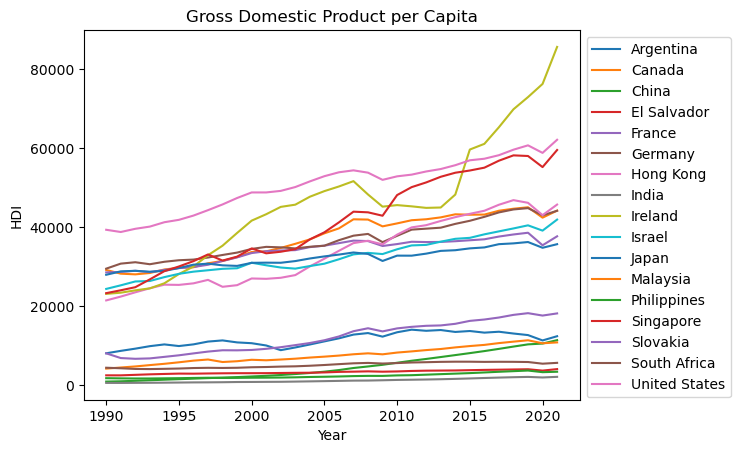

In [11]:
hdi_gdp_selected_countries.set_index(['Country', 'Year'], inplace=True)
hdi_gdp_selected_countries['GDP'].unstack(level='Country').plot(ylabel='HDI', title='Gross Domestic Product per Capita')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

set index to country and year to unstack data to move the years into their own single column, plotted the results for HDI

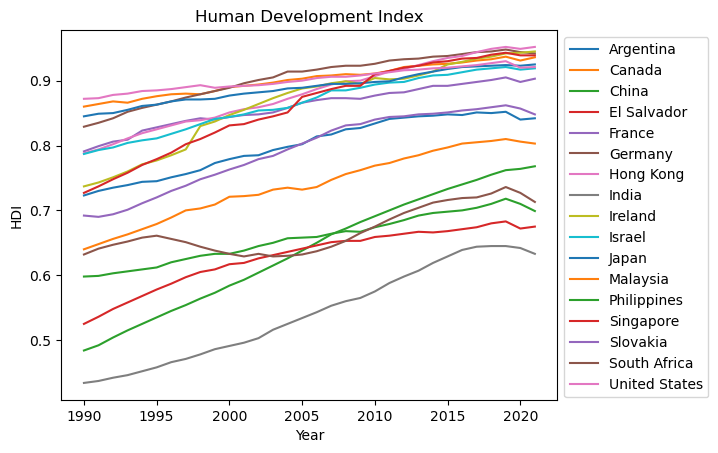

In [12]:
hdi_gdp_selected_countries['HDI'].unstack(level='Country').plot(ylabel='HDI', title='Human Development Index')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

clarify if scatter plot is needed. 


<Axes: xlabel='HDI', ylabel='GDP'>

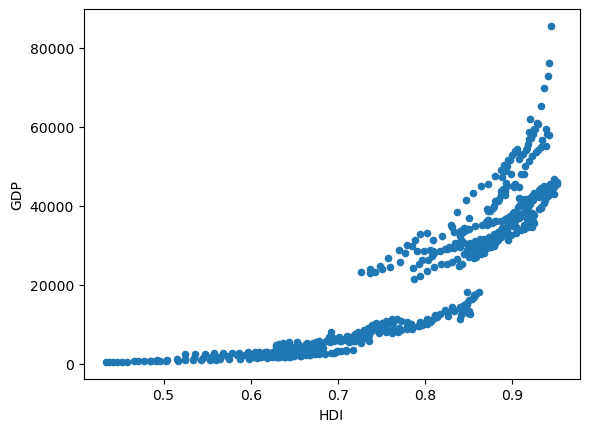

In [13]:
#Ask about inclusion.  Difficult to read.
hdi_gdp_selected_countries.plot.scatter(x='HDI', y='GDP')

grouped results by the country and returned the average

In [14]:
average_by_country_df = hdi_gdp_selected_countries.groupby(level='Country').mean()
average_by_country_df

,HDI,GDP
Country,,
Argentina,0.800656,11499.499062
Canada,0.901750,37198.967187
China,0.638406,4674.115000
El Salvador,0.628875,3288.254375
France,0.860062,34015.344688
Germany,0.904687,36696.556563
Hong Kong,0.880062,33588.676250
India,0.541250,1152.691250
Ireland,0.864375,45988.504375


returned the correlation of the average results

In [15]:
average_by_country_df.corr()

,HDI,GDP
HDI,1.000000,0.896802
GDP,0.896802,1.000000


clarify if scatter plot is needed

<Axes: xlabel='GDP', ylabel='HDI'>

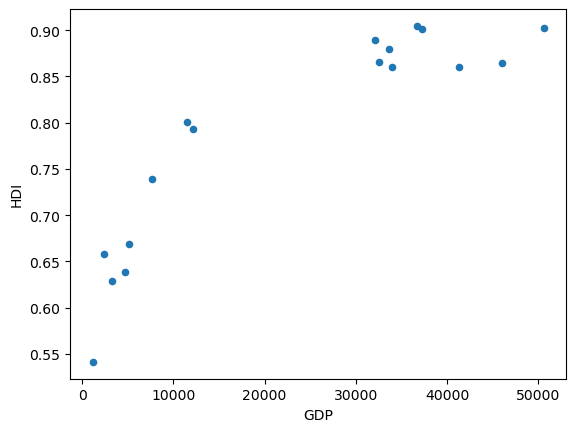

In [16]:
average_by_country_df.plot.scatter(x='GDP', y='HDI')

plotted linear regression

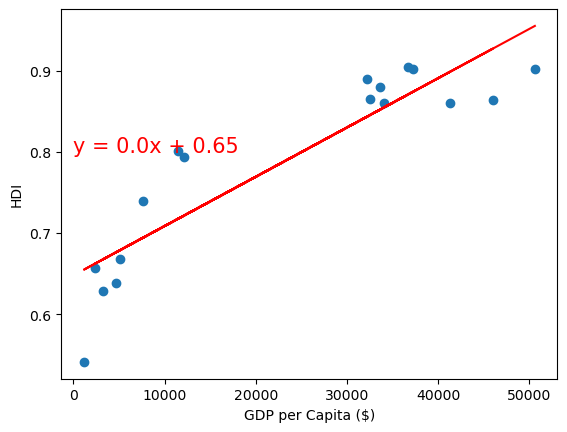

In [17]:
# Add the linear regression equation and line to plot
x_values = average_by_country_df['GDP']
y_values = average_by_country_df['HDI']

# Ask about the slope value on this
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('GDP per Capita ($)')
plt.ylabel('HDI')
plt.show()

display the GDP index for US

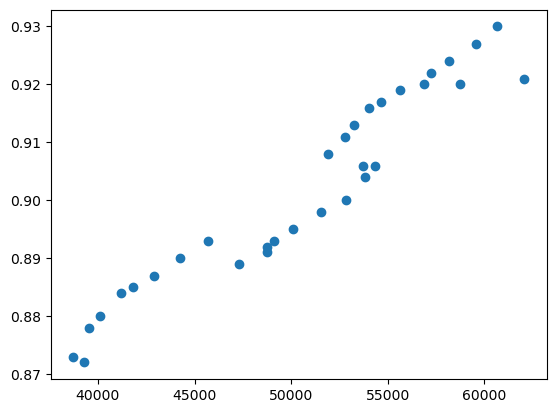

In [19]:
plt.scatter(hdi_gdp_country_df['United States']['GDP'], hdi_gdp_country_df['United States']['HDI'])



displayed the HDI for India

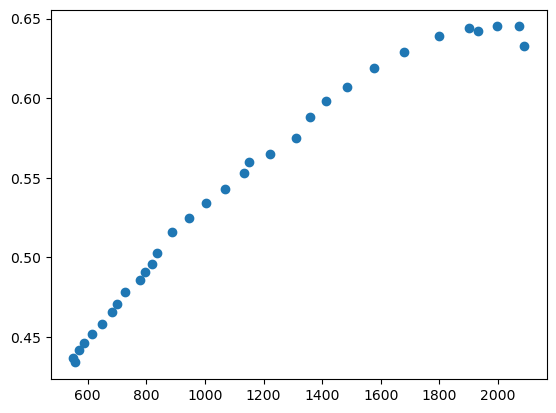

In [20]:
plt.scatter(hdi_gdp_country_df['India']['GDP'], hdi_gdp_country_df['India']['HDI'])

displayed HDI for Argentina

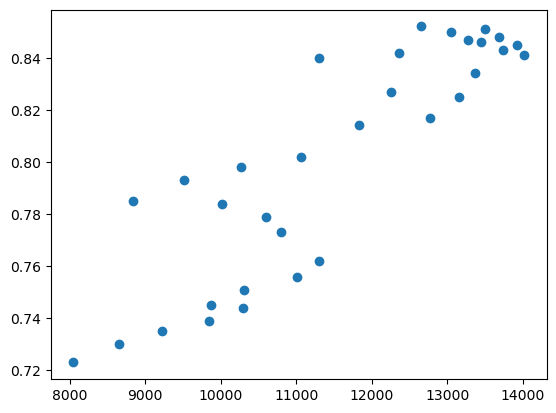

In [21]:
plt.scatter(hdi_gdp_country_df['Argentina']['GDP'], hdi_gdp_country_df['Argentina']['HDI'])

Displayed the HDI

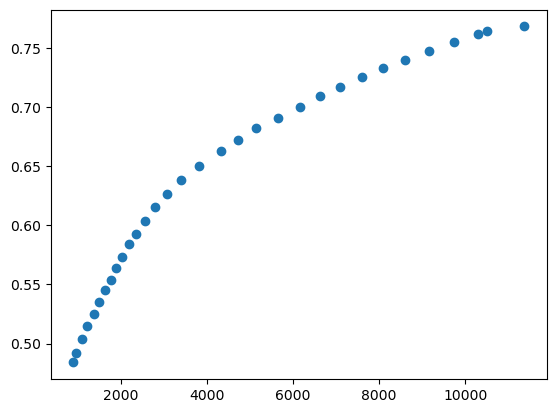

In [22]:
plt.scatter(hdi_gdp_country_df['China']['GDP'], hdi_gdp_country_df['China']['HDI'])